In [2]:
!pip install tensorflow==2.6.0

  Using cached tensorflow-2.6.0-cp37-cp37m-win_amd64.whl (423.2 MB)
  Using cached grpcio-1.40.0-cp37-cp37m-win_amd64.whl (3.2 MB)
  Using cached tensorflow_estimator-2.6.0-py2.py3-none-any.whl (462 kB)
  Using cached absl_py-0.13.0-py3-none-any.whl (132 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
Processing c:\users\uzaif ahmed\appdata\local\pip\cache\wheels\62\76\4c\aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6\wrapt-1.12.1-py3-none-any.whl
Processing c:\users\uzaif ahmed\appdata\local\pip\cache\wheels\98\91\04\971b4c587cf47ae952b108949b46926f426c02832d120a082a\clang-5.0-py3-none-any.whl
  Using cached h5py-3.1.0-cp37-cp37m-win_amd64.whl (2.7 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorboard-2.6.0-py3-none-any.whl (5.6 MB)
  Using cac

In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers

In [4]:
tf.__version__

'2.6.0'

In [5]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

In [7]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'Datasets',
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE)

Found 2152 files belonging to 3 classes.


In [9]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [10]:
len(dataset)

68

In [11]:
2152/32

67.25

In [14]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 0 1 0 1 2 1 2 1 1 1 1 0 1]


32 images, 256 by 256 size and RGB

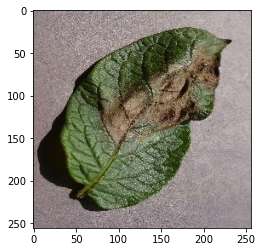

In [20]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))

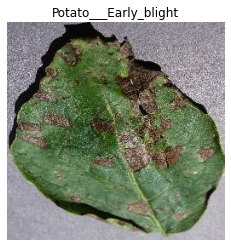

In [22]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.title(class_names[label_batch[1]])
    plt.axis('off')

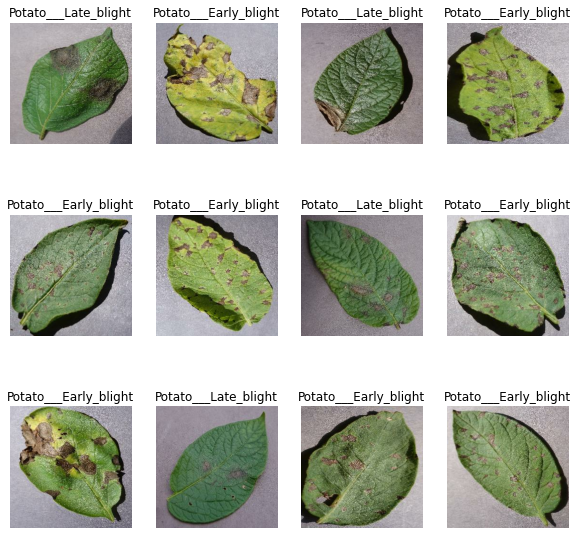

In [25]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [37]:
train_size =0.8

In [38]:
len(dataset)*train_size

54.400000000000006

In [36]:
train_ds = dataset.take(54)
len(train_ds)

54

In [40]:
test_ds = dataset.skip(len(train_ds))
len(test_ds)

14

In [41]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [49]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [50]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [53]:
def ds_dividing(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds


In [54]:
train_ds, val_ds, test_ds = ds_dividing(dataset)

In [55]:
len(train_ds)

54

In [56]:
len(val_ds)

6

Watch 23:16